In [1]:
from os.path import join, split, basename

from src.utils.io import search_for_extensions
from src.utils.io import read_image, draw_rectangle, make_input_image
from src.utils.paths import PATH_DATA
from src.utils.visualization import show_image
from tqdm import tqdm

In [2]:
PATH_CELEB_ALIGN_IMAGES = join(PATH_DATA, 'celeb_id_aligned')

In [3]:
import json
reference = json.loads(open(join(PATH_DATA, 'data.json'), 'r').read())
# key - file name, value - map with eyes description
reference_by_path = dict()
for person in reference.keys():
    for image_reference in reference[person]:
        reference_by_path[image_reference['filename']] = image_reference
# print(reference.keys())
# print(images_names)

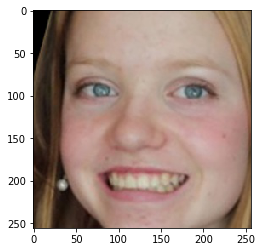

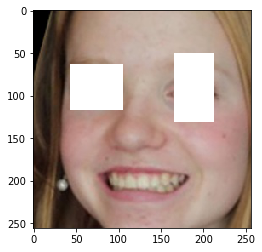

In [4]:
filename = list(reference_by_path.keys())[8]

path = join(PATH_CELEB_ALIGN_IMAGES, filename)
image = read_image(path)
show_image(image)
make_input_image(image, reference_by_path[filename], -1)
show_image(image)

In [5]:
import numpy as np

def downscale256to128(image):
    img = image[:, ::2, ::2]
    return img

def make_test_dataset():
    filenames = list(reference_by_path.keys())
    images = []
    masks = []
    for i, filename in tqdm(enumerate(filenames[:200])):
        path = join(PATH_CELEB_ALIGN_IMAGES, filename)
        y = read_image(path)
        x = np.zeros((1, 256, 256), dtype=np.uint8)
        make_input_image(x, reference_by_path[filename], 1)
        y = downscale256to128(y)
        x = downscale256to128(x)
        images.append(y.copy())
        masks.append(x.copy())
#         show_image(x)
#         show_image(y)
    images = np.array(images)
    masks = np.array(masks)
    np.save(join(PATH_DATA, 'masks.npy'), masks)
    np.save(join(PATH_DATA, 'images.npy'), images)
        
make_test_dataset()

200it [00:01, 142.15it/s]


In [6]:
from src.test import test
test()

INFO:tensorflow:Restoring parameters from C:\work\MIPT\ML_ABBYY\eye-inpainting\data\models\latest
(200, 1, 128, 128)
uint8


100%|██████████████████████████████████████████████████████████████████████████████████████| 12/12 [01:46<00:00,  8.96s/it]
